In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

def parse_my_results(file_path):
    rows = []
    
    with open(file_path, 'r', encoding='utf-8') as f:
        content = f.read()
    
    for line in content.split('\n'):
        if '│' in line and any(m in line for m in ['Smart', 'Conflict', 'Random']):
            parts = [p.strip() for p in line.split('│')]
            if len(parts) >= 8:
                try:
                    rows.append({
                        'Selection': parts[2],
                        'Crossover': parts[3],
                        'Mutation': parts[4],
                        'Fitness': int(parts[5]),
                        'Time': float(parts[7])
                    })
                except (ValueError, IndexError):
                    continue
    return pd.DataFrame(rows)

In [2]:
path_to_files = '/home/user/minimumEdgeColoring/resultsGA' 

all_results = []
for filename in os.listdir(path_to_files):
    if filename.startswith('big') and filename.endswith('.txt'):
        print(f"Pronađen i učitan: {filename}")
        temp_df = parse_my_results(os.path.join(path_to_files, filename))
        temp_df['Graph'] = filename
        all_results.append(temp_df)

if all_results:
    master_df = pd.concat(all_results, ignore_index=True)
    print(f"\nUkupno učitano {len(all_results)} fajlova.")
    print(f"Ukupan broj testova: {len(master_df)}")
else:
    print("PAŽNJA: Nije pronađen nijedan fajl koji počinje sa 'big'!")

Pronađen i učitan: big55.txt
Pronađen i učitan: big23.txt
Pronađen i učitan: big47.6.txt
Pronađen i učitan: big30.txt
Pronađen i učitan: big22.txt
Pronađen i učitan: big79.txt
Pronađen i učitan: big70.txt
Pronađen i učitan: big64.txt
Pronađen i učitan: big95.txt

Ukupno učitano 9 fajlova.
Ukupan broj testova: 243


In [3]:
agg_df = master_df.groupby(['Selection', 'Crossover', 'Mutation']).agg({
    'Fitness': 'mean',
    'Time': 'mean'
}).reset_index()

print("Statistika je izračunata.")

Statistika je izračunata.


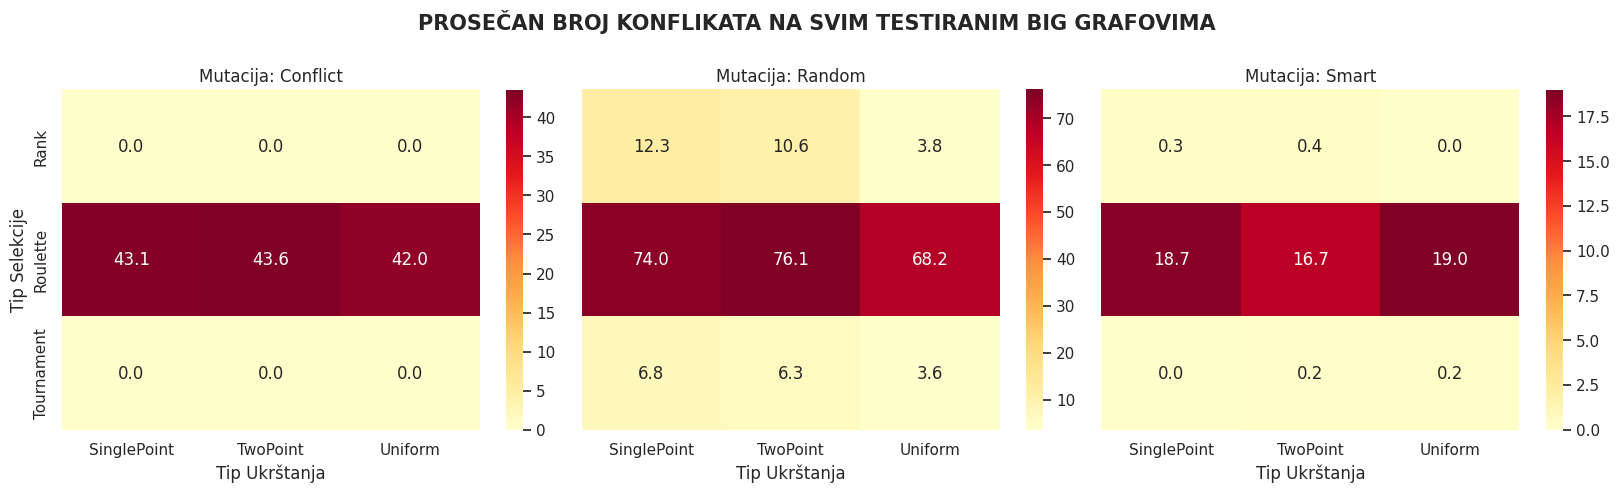

In [4]:
sns.set_theme(style="white")

g = sns.FacetGrid(agg_df, col="Mutation", height=5, aspect=1.1)

def draw_heatmap(*args, **kwargs):
    data = kwargs.pop('data')
    pivoted = data.pivot(index='Selection', columns='Crossover', values='Fitness')
    sns.heatmap(pivoted, annot=True, fmt=".1f", cmap="YlOrRd", cbar=True, **kwargs)

g.map_dataframe(draw_heatmap)

g.set_axis_labels("Tip Ukrštanja", "Tip Selekcije")
g.set_titles(col_template="Mutacija: {col_name}")
plt.subplots_adjust(top=0.82)
g.fig.suptitle('PROSEČAN BROJ KONFLIKATA NA SVIM TESTIRANIM BIG GRAFOVIMA', fontsize=15, fontweight='bold')

plt.show()

In [5]:
path_to_files = '/home/user/minimumEdgeColoring/resultsGA' 

bip_dfs = []
for filename in os.listdir(path_to_files):
    if filename.startswith('completeBipartite') and filename.endswith('.txt'):
        print(f"Učitavam rezultate za bipartitni graf: {filename}")
        temp_df = parse_my_results(os.path.join(path_to_files, filename))
        temp_df['Graph'] = filename
        bip_dfs.append(temp_df)

if bip_dfs:
    master_bip_df = pd.concat(bip_dfs, ignore_index=True)
    agg_bip_df = master_bip_df.groupby(['Selection', 'Crossover', 'Mutation']).agg({
        'Fitness': 'mean',
        'Time': 'mean'
    }).reset_index()
    print("\nUspešno obrađeni podaci za bipartitne grafove!")
else:
    print("Greška: Nisu pronađeni fajlovi koji počinju sa 'bipartitni'.")

Učitavam rezultate za bipartitni graf: completeBipartite20.txt
Učitavam rezultate za bipartitni graf: completeBipartite10.txt

Uspešno obrađeni podaci za bipartitne grafove!


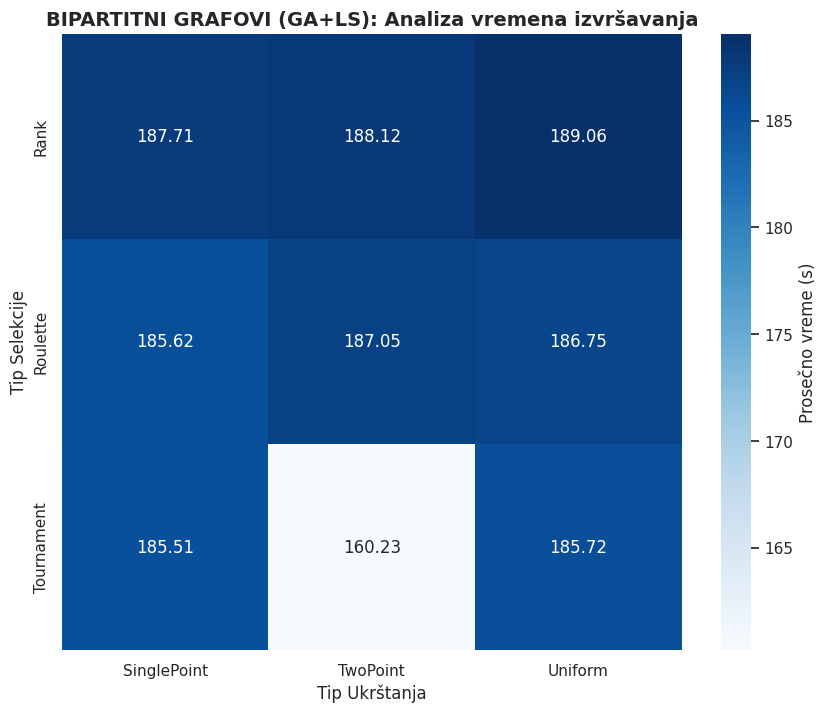

In [ ]:
sns.set_theme(style="white")

plt.figure(figsize=(10, 8))

bip_pivot_time = agg_bip_df.pivot_table(index='Selection', columns='Crossover', values='Time', aggfunc='mean')

sns.heatmap(bip_pivot_time, annot=True, fmt=".2f", cmap="Blues", cbar_kws={'label': 'Prosečno vreme (s)'})

plt.title('BIPARTITNI GRAFOVI (GA+LS): Analiza vremena izvršavanja', fontsize=14, fontweight='bold')
plt.xlabel('Tip Ukrštanja')
plt.ylabel('Tip Selekcije')

plt.show()

In [7]:
file_ga = '/home/user/minimumEdgeColoring/resultsGA/completeGraph11.txt'      # Fajl rađen sa čistim GA (Delta + 1)
file_ls = '/home/user/minimumEdgeColoring/resultsGA/completeGraph20.txt'    # Fajl rađen sa hibridnim GA + LS

df_ga_complete = parse_my_results(file_ga)
df_ls_complete = parse_my_results(file_ls)

piv_ga = df_ga_complete.pivot_table(index='Selection', columns='Crossover', values='Fitness', aggfunc='mean')
piv_ls = df_ls_complete.pivot_table(index='Selection', columns='Crossover', values='Fitness', aggfunc='mean')

print("Fajlovi uspešno učitani i spremni za prikaz!")

Fajlovi uspešno učitani i spremni za prikaz!


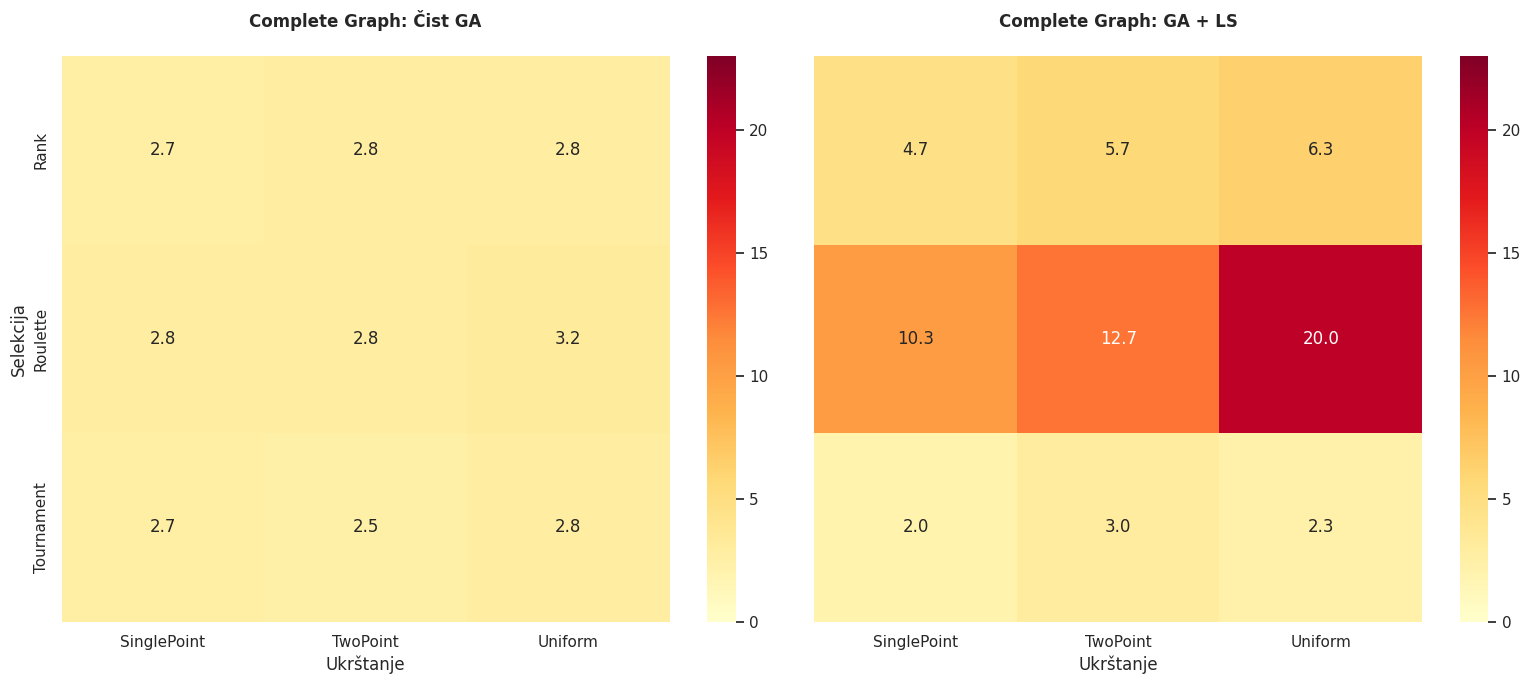

In [8]:


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 7), sharey=True)

v_max = max(df_ga_complete['Fitness'].max(), df_ls_complete['Fitness'].max())

sns.heatmap(piv_ga, annot=True, fmt=".1f", cmap="YlOrRd", vmin=0, vmax=v_max, ax=ax1)
ax1.set_title(f'Complete Graph: Čist GA\n', fontsize=12, fontweight='bold')
ax1.set_xlabel('Ukrštanje')
ax1.set_ylabel('Selekcija')

sns.heatmap(piv_ls, annot=True, fmt=".1f", cmap="YlOrRd", vmin=0, vmax=v_max, ax=ax2)
ax2.set_title(f'Complete Graph: GA + LS\n', fontsize=12, fontweight='bold')
ax2.set_xlabel('Ukrštanje')
ax2.set_ylabel('')

plt.tight_layout()
plt.show()

Sve selekcije u fajlovima: ['Tournament' 'Roulette' 'Rank']


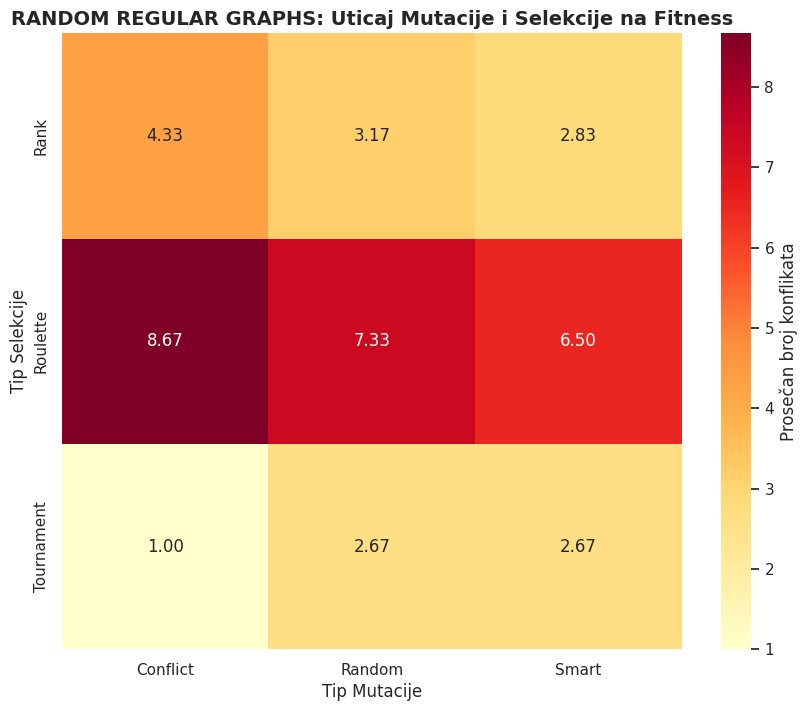


Uspešno obrađeni podaci za random regular grafove!


In [9]:
path_to_files = '/home/user/minimumEdgeColoring/resultsGA' 

def parse_random_graph_table(file_path):
    data = []
    with open(file_path, 'r', encoding='utf-8') as f:
        for line in f:
            if '│' in line and not any(x in line.lower() for x in ['selection', '---']):
                parts = [p.strip() for p in line.split('│')]
                if len(parts) > 7:
                    data.append({
                        'Selection': parts[2],
                        'Crossover': parts[3],
                        'Mutation': parts[4],
                        'Fitness': float(parts[5]), 
                        'Time': float(parts[7])
                    })
    return pd.DataFrame(data)

gnp_dfs = []
for filename in os.listdir(path_to_files):
    if 'randomGraph' in filename and filename.endswith('.txt'):
        temp_df = parse_random_graph_table(os.path.join(path_to_files, filename))
        temp_df['Graph'] = filename
        gnp_dfs.append(temp_df)

if gnp_dfs:
    master_gnp_df = pd.concat(gnp_dfs, ignore_index=True)
    print("Sve selekcije u fajlovima:", master_gnp_df['Selection'].unique())
    
    agg_gnp_df = master_gnp_df.groupby(['Selection', 'Mutation']).agg({
        'Fitness': 'mean',
        'Time': 'mean'
    }).reset_index()

    plt.figure(figsize=(10, 8))
    sns.set_theme(style="white")

    gnp_pivot = agg_gnp_df.pivot_table(index='Selection', columns='Mutation', values='Fitness', aggfunc='mean')

    sns.heatmap(gnp_pivot, annot=True, fmt=".2f", cmap="YlOrRd", cbar_kws={'label': 'Prosečan broj konflikata'})

    plt.title('RANDOM REGULAR GRAPHS: Uticaj Mutacije i Selekcije na Fitness', fontsize=14, fontweight='bold')
    plt.xlabel('Tip Mutacije')
    plt.ylabel('Tip Selekcije')
    plt.show()
    
    print("\nUspešno obrađeni podaci za random regular grafove!")
else:
    print("Nisu pronađeni 'randomGraph' fajlovi.")

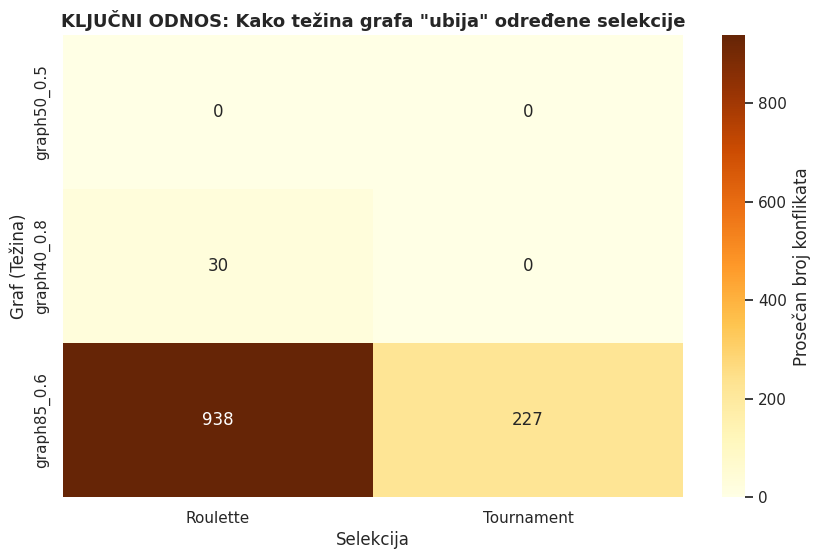

In [10]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt

path_to_files = 'resultsGA' 
target_files = ['graph50_0.5.txt', 'graph40_0.8.txt', 'graph85_0.6.txt']

def parse_key_stats(file_path):
    data = []
    g_name = os.path.basename(file_path).replace('.txt', '')
    with open(file_path, 'r', encoding='utf-8') as f:
        for line in f:
            if '│' in line and not any(x in line.lower() for x in ['rank', 'selection']):
                parts = [p.strip() for p in line.split('│')]
                if len(parts) > 7 and parts[1].isdigit():
                    data.append({
                        'Graf (Težina)': g_name,
                        'Selekcija': parts[2],
                        'Konflikti': float(parts[5])
                    })
    return pd.DataFrame(data)

dfs = [parse_key_stats(os.path.join(path_to_files, f)) for f in target_files if os.path.exists(os.path.join(path_to_files, f))]
master_df = pd.concat(dfs, ignore_index=True)

plt.figure(figsize=(10, 6))
pivot = master_df.pivot_table(index='Graf (Težina)', columns='Selekcija', values='Konflikti', aggfunc='mean')

pivot = pivot.reindex(['graph50_0.5', 'graph40_0.8', 'graph85_0.6'])

sns.heatmap(pivot, annot=True, fmt=".0f", cmap="YlOrBr", cbar_kws={'label': 'Prosečan broj konflikata'})
plt.title('KLJUČNI ODNOS: Kako težina grafa "ubija" određene selekcije', fontsize=13, fontweight='bold')
plt.show()

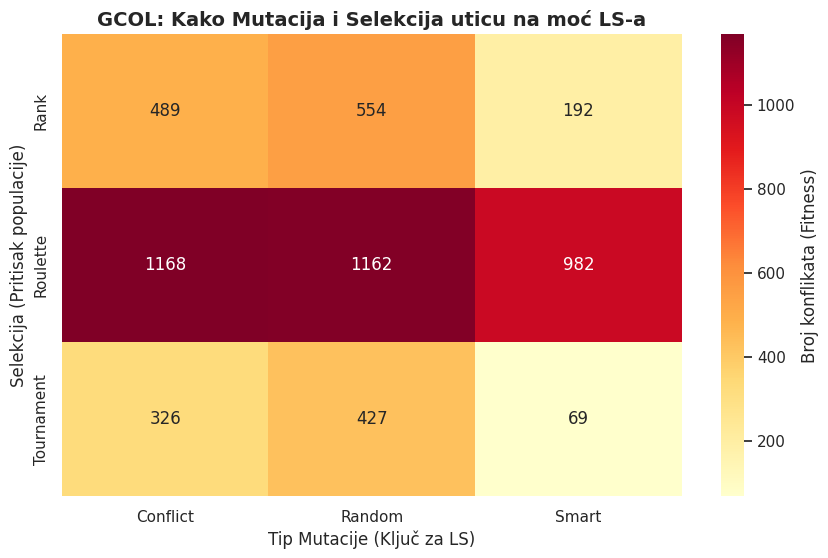

In [11]:
file_path = 'resultsGA/gcol.txt'

def auto_parse_gcol(path):
    rows = []
    if not os.path.exists(path):
        print(f"Nema fajla na putanji: {path}")
        return pd.DataFrame()
        
    with open(path, 'r', encoding='utf-8') as f:
        for line in f:
            
            if '│' in line and not any(x in line for x in ['selection', '───', '═══']):
                parts = [p.strip() for p in line.split('│')]
                
                if len(parts) >= 8 and parts[1].isdigit():
                    rows.append({
                        'selection': parts[2],
                        'mutation': parts[4],
                        'fitness': float(parts[5])
                    })
    return pd.DataFrame(rows)


df = auto_parse_gcol(file_path)

if not df.empty:
    pivot_table = df.pivot_table(index='selection', columns='mutation', values='fitness', aggfunc='mean')

    plt.figure(figsize=(10, 6))
    sns.heatmap(pivot_table, annot=True, fmt=".0f", cmap="YlOrRd", cbar_kws={'label': 'Broj konflikata (Fitness)'})

    plt.title('GCOL: Kako Mutacija i Selekcija uticu na moć LS-a', fontsize=14, fontweight='bold')
    plt.xlabel('Tip Mutacije (Ključ za LS)')
    plt.ylabel('Selekcija (Pritisak populacije)')
    plt.show()
else:
    print("Nije uspeo da izvuče podatke. Proveri format fajla!")